In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset from the provided URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [ ]:
# Combine rows to form the complete dataset
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# Create a DataFrame from the combined data and add the target variable
df = pd.DataFrame(data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
df['PRICE'] = target

In [ ]:
# Step 1: Clean column names (they are already clean here)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'\W', '', regex=True)
print("Cleaned Column Names:", df.columns)

Cleaned Column Names: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [ ]:
# Step 2: Handle missing values (Boston dataset doesn't have missing values, but here's how you would handle them)
# Example: Drop rows with missing values
df = df.dropna()

In [ ]:
# Step 3: Data merging - not applicable here as there's no additional dataset

In [ ]:
# Step 4: Filter and subset the data
# Example: Filter properties with prices above the median price
median_price = df['PRICE'].median()
df_filtered = df[df['PRICE'] > median_price]

In [ ]:
# Step 5: Handle categorical variables by encoding them
# Example: CHAS is a categorical variable (Charles River dummy variable)
# Since CHAS is binary, it can be used directly or converted as needed (it’s already numeric)

In [ ]:
# Step 6: Aggregate the data to calculate summary statistics
# Example: Calculate average prices by the CHAS feature
average_prices = df.groupby('CHAS')['PRICE'].mean().reset_index()
print("Average Prices by CHAS:\n", average_prices)

Average Prices by CHAS:
    CHAS      PRICE
0   0.0  22.093843
1   1.0  28.440000


In [ ]:
# Step 7: Identify and handle outliers
# Example: Identify outliers in PRICE using IQR
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['PRICE'] < (Q1 - 1.5 * IQR)) | (df['PRICE'] > (Q3 + 1.5 * IQR))]

In [ ]:
# Option 1: Remove outliers
df = df[~((df['PRICE'] < (Q1 - 1.5 * IQR)) | (df['PRICE'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Step 11: Data Visualization using matplotlib and seaborn

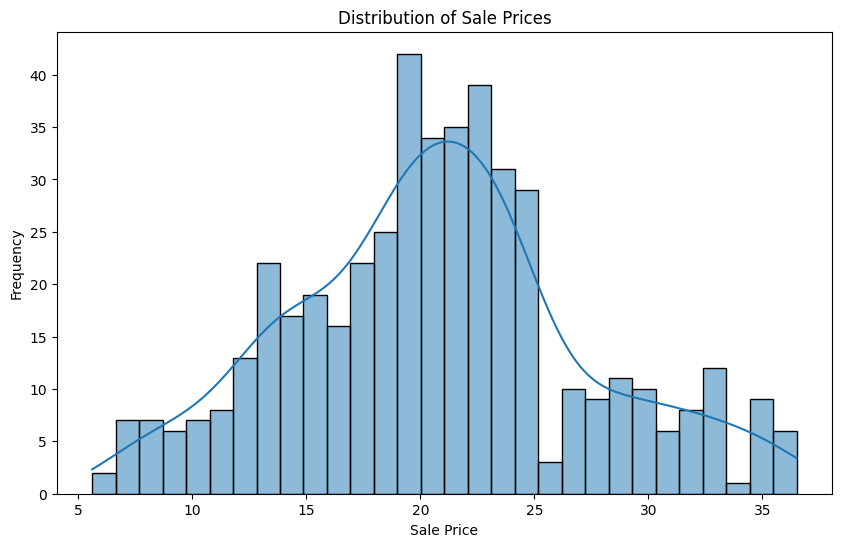

In [ ]:
# Visualize distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

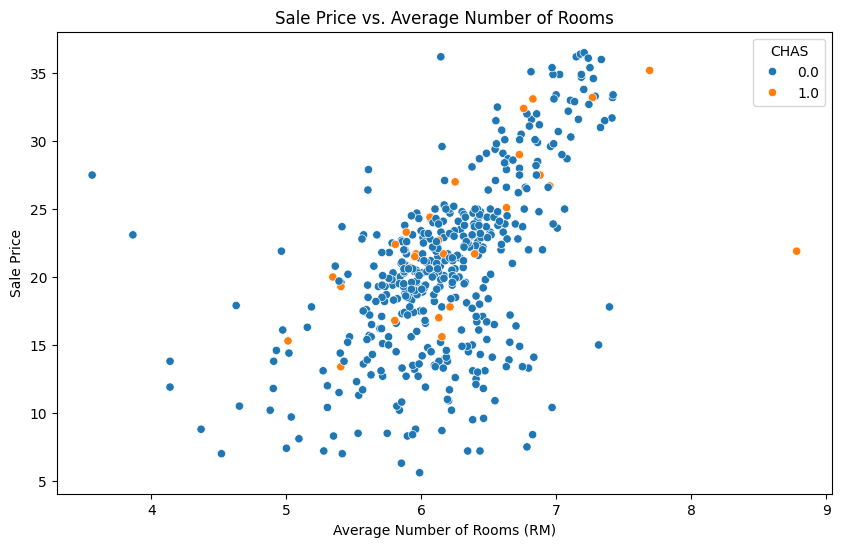

In [ ]:
# Visualize the relationship between Sale Price and a feature (e.g., RM - average number of rooms per dwelling)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RM', y='PRICE', hue='CHAS')
plt.title('Sale Price vs. Average Number of Rooms')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Sale Price')
plt.show()

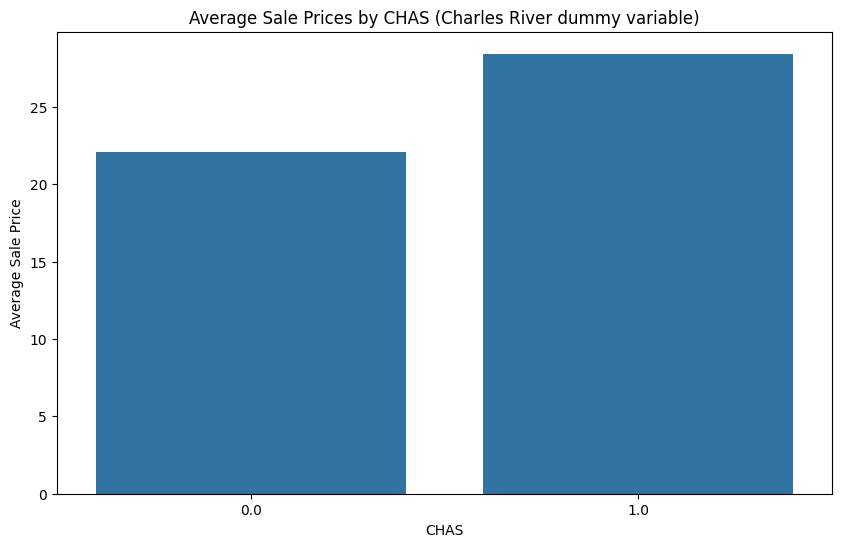

In [ ]:
# Visualize average sale prices by Charles River variable (CHAS)
plt.figure(figsize=(10, 6))
sns.barplot(x='CHAS', y='PRICE', data=average_prices)
plt.title('Average Sale Prices by CHAS (Charles River dummy variable)')
plt.xlabel('CHAS')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=0)
plt.show()